In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn as nn


import pickle
import os
import time

if not os.path.exists('models'):
    os.makedirs('models')

if not os.path.exists('results'):
    os.makedirs('results')

if not os.path.exists('data'):
    os.makedirs('data')


c:\Users\Galhom\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


### `Loading the dataset`

In [2]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [3]:
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=2)

test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=False, num_workers=2)

classes = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7906162..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0151556..2.0125492].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8610327..2.5179958].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.2535014].


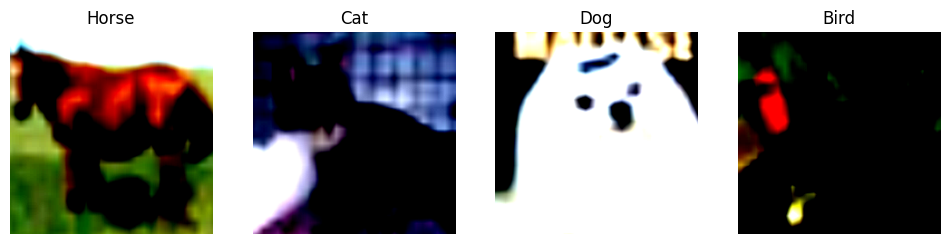

In [13]:
# Get the first 4 images 
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
for i in range(4):
    axes[i].imshow(images[i].numpy().transpose((1, 2, 0)))
    axes[i].set_title(classes[labels[i]])
    axes[i].axis('off')
plt.show()

In [14]:
#Use VGG16 from pytorch
vgg_model = torchvision.models.vgg16(pretrained=True)
vgg_model.eval()

c:\Users\Galhom\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Galhom\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [15]:
# Modify the classifier to match CIFAR-10 output
vgg_model.classifier[3] = nn.Linear(4096,512)
vgg_model.classifier[6] = nn.Linear(512,10)
vgg_model.eval()


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [16]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda:0


In [17]:
vgg_model.to(device)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg_model.parameters(), lr=0.001, momentum=0.7)

In [19]:
train_loss = []
train_accuracy = []
epoch_time = []

for epoch in range(4):  # loop over the dataset multiple times
    running_loss = 0.0
    correct = 0
    total = 0
    start_time = time.time()
    
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        output = vgg_model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # print statistics
        running_loss += loss.item()
        if i % 4000 == 3999:    # print every 4000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 4000))
            print('Time:', time.time() - start_time)
            running_loss = 0.0
    
    # Calculate epoch metrics
    end_time = time.time()
    epoch_time.append(end_time - start_time)
    
    # Calculate average loss for the epoch
    epoch_loss = 0.0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = vgg_model(images)
            loss = criterion(outputs, labels)
            epoch_loss += loss.item()
    
    avg_loss = epoch_loss / len(trainloader)
    train_loss.append(avg_loss)
    
    # Calculate accuracy for the epoch
    accuracy = 100 * correct / total
    train_accuracy.append(accuracy)
    
    print(f'Epoch {epoch+1} completed. Loss: {avg_loss:.3f}, Accuracy: {accuracy:.2f}%, Time: {epoch_time[-1]:.2f}s')

print('Finished Training of VGG16 on CIFAR-10')

[1,  4000] loss: 0.631
Time: 404.2178030014038
[1,  8000] loss: 0.424
Time: 822.8475484848022
[1, 12000] loss: 0.357
Time: 1233.3892104625702
Epoch 1 completed. Loss: 0.244, Accuracy: 84.03%, Time: 1282.60s
[2,  4000] loss: 0.232
Time: 396.79167437553406
[2,  8000] loss: 0.220
Time: 788.1468069553375
[2, 12000] loss: 0.224
Time: 1183.123949289322
Epoch 2 completed. Loss: 0.108, Accuracy: 92.33%, Time: 1233.06s
[3,  4000] loss: 0.115
Time: 407.81313276290894
[3,  8000] loss: 0.130
Time: 776.0187246799469
[3, 12000] loss: 0.136
Time: 1156.0783007144928
Epoch 3 completed. Loss: 0.070, Accuracy: 95.59%, Time: 1204.46s
[4,  4000] loss: 0.077
Time: 431.03930616378784
[4,  8000] loss: 0.093
Time: 852.0480763912201
[4, 12000] loss: 0.089
Time: 1269.8485543727875
Epoch 4 completed. Loss: 0.062, Accuracy: 97.01%, Time: 1322.21s
Finished Training of VGG16 on CIFAR-10


In [20]:
#Testing Accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = vgg_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network : %.2f %%' % (100 * correct / total))

Accuracy of the network : 90.38 %


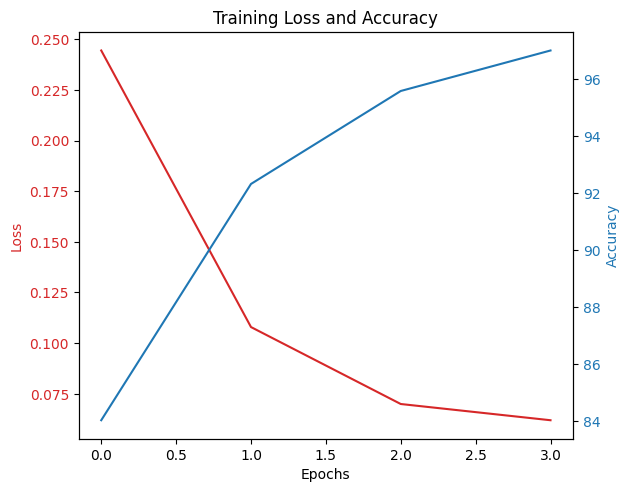

In [21]:
#Training accuracy/loss curves

def plot_loss_accuracy(train_loss, train_accuracy):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss', color=color)
    ax1.plot(train_loss, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Accuracy', color=color)  
    ax2.plot(train_accuracy, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.title('Training Loss and Accuracy')
    plt.show()
plot_loss_accuracy(train_loss, train_accuracy)


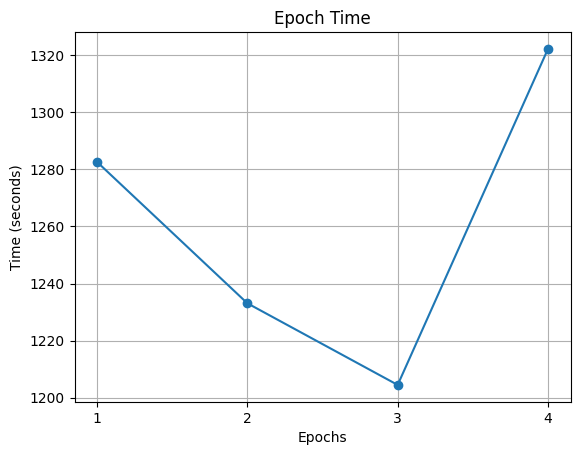

In [22]:
# plot the training time for each epoch where step size on the graph is 1 epoch
# and the y-axis is the time taken for each epoch in seconds
def plot_epoch_time(epoch_time):
    plt.plot(range(1, len(epoch_time) + 1), epoch_time, marker='o')
    plt.title('Epoch Time')
    plt.xlabel('Epochs')
    plt.ylabel('Time (seconds)')
    plt.xticks(range(1, len(epoch_time) + 1))
    plt.grid()
    plt.show()

plot_epoch_time(epoch_time)

In [23]:
#Save the training loss and accuracy and epoch time
with open(os.path.join('results', 'training_results_vgg16.pkl'), 'wb') as f:
    pickle.dump({'loss': train_loss, 'accuracy': train_accuracy, 'epoch_time': epoch_time}, f)

In [24]:
# Save the model architecture and weights
PATH = os.path.join(os.getcwd(),'models', 'vgg_cifar10.pth')
torch.save(vgg_model.state_dict(), PATH)


### `VGG16 with BN`

In [5]:
#Use VGG16 bn from pytorch
vgg_bn_model = torchvision.models.vgg16_bn(pretrained=True)
vgg_bn_model.eval()


Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to C:\Users\Galhom/.cache\torch\hub\checkpoints\vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [02:50<00:00, 3.25MB/s] 


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [6]:
# Modify the classifier to match CIFAR-10 output
vgg_bn_model.classifier[3] = nn.Linear(4096,512)
vgg_bn_model.classifier[6] = nn.Linear(512,10)
vgg_bn_model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
vgg_bn_model.to(device)

Using device: cuda:0


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg_bn_model.parameters(), lr=0.001, momentum=0.7)

In [9]:
train_loss = []
train_accuracy = []
epoch_time = []

for epoch in range(1):  # loop over the dataset multiple times
    running_loss = 0.0
    correct = 0
    total = 0
    start_time = time.time()
    
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        output = vgg_bn_model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # print statistics
        running_loss += loss.item()
        if i % 4000 == 3999:    # print every 4000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 4000))
            print('Time:', time.time() - start_time)
            running_loss = 0.0
    
    # Calculate epoch metrics
    end_time = time.time()
    epoch_time.append(end_time - start_time)
    
    # Calculate average loss for the epoch
    epoch_loss = 0.0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = vgg_bn_model(images)
            loss = criterion(outputs, labels)
            epoch_loss += loss.item()
    
    avg_loss = epoch_loss / len(trainloader)
    train_loss.append(avg_loss)
    
    # Calculate accuracy for the epoch
    accuracy = 100 * correct / total
    train_accuracy.append(accuracy)
    
    print(f'Epoch {epoch+1} completed. Loss: {avg_loss:.3f}, Accuracy: {accuracy:.2f}%, Time: {epoch_time[-1]:.2f}s')

print('Finished Training of VGG16BN on CIFAR-10')

[1,  4000] loss: 0.727
Time: 391.5654525756836
[1,  8000] loss: 0.456
Time: 774.4879825115204
[1, 12000] loss: 0.395
Time: 1176.9241182804108
Epoch 1 completed. Loss: 0.277, Accuracy: 82.29%, Time: 1232.86s
Finished Training of VGG16BN on CIFAR-10


In [10]:
#Testing Accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = vgg_bn_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network : %.2f %%' % (100 * correct / total))

Accuracy of the network : 87.67 %


In [ ]:
plot_loss_accuracy(train_loss, train_accuracy)

In [ ]:
plot_epoch_time(epoch_time)

In [11]:
# Save the training loss and accuracy and epoch time
with open(os.path.join('results', 'training_results_vgg16_bn.pkl'), 'wb') as f:
    pickle.dump({'loss': train_loss, 'accuracy': train_accuracy, 'epoch_time': epoch_time}, f)

In [12]:
# Save the model
with open(os.path.join('models', 'vgg_bn_cifar10.pth'), 'wb') as f:
    torch.save(vgg_bn_model.state_dict(), f)
